In [1]:
#Kütüphanelerimizi okutalım
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Veriyi okutalım
data=pd.read_csv('superstore.csv')

In [3]:
#İlk 5 satırı okuyalım
data.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


Veri kümesine baktığımız zaman bir süpermarketin ürün kategorileri,şehirleri,müşterileri,siparişleri,satış verilerini içerdiğini görüyoruz.Bizim için bazı önemli satırlar şunlardır:

Category: Ürün kategorileri (örneğin, Office Supplies, Furniture).
City: Satışın gerçekleştiği şehir.
Country: Ülke.
Customer ID ve Customer Name: Müşteri bilgileri.
Discount: İndirim oranı.
Order Date ve Ship Date: Sipariş ve sevkiyat tarihleri.
Sales: Satış miktarları.
Segment: Müşteri segmenti.
Shipping Cost: Nakliye maliyeti.
State: Eyalet.
Sub-Category: Ürün alt kategorisi.

In [6]:
#Hangi kategoride daha fazla satış yapıldığını görmemizi sağlar
counts_category=data.Category.value_counts()
counts_category

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

Yukarıdaki verilere baktığımızdaen çok satışın ofis malzemelerinde yapıldığını görüyoruz onu takiben Teknoloji kategorisi 2.sırada yer almaktadır

In [9]:
#Şehr bazlı satış performansını alalım
count_city=data.City.value_counts()
count_city.head()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
Name: City, dtype: int64

Şehir bazlı satış performansında,en çok sipariş verilen şehir 915 sipariş ile New York City'dir.

Text(0, 0.5, 'Sipariş Sayısı')

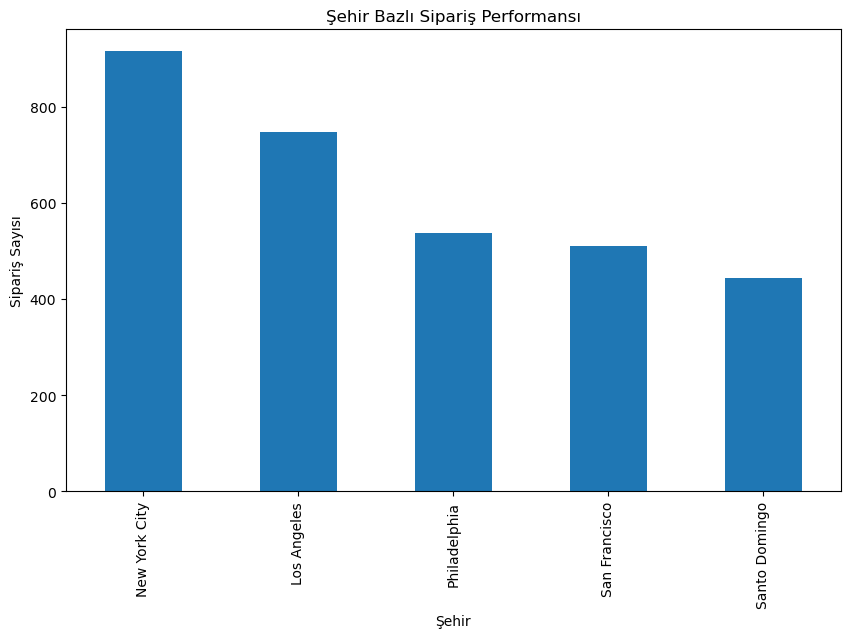

In [12]:
#En çok satış yapılan şehirleri grafikleştirelim
top_cities=count_city.head()
plt.figure(figsize=(10,6))
top_cities.plot(kind="bar")
plt.title("Şehir Bazlı Sipariş Performansı")
plt.xlabel('Şehir')
plt.ylabel('Sipariş Sayısı')

In [13]:
#Verilerin istatiksel özetlerini alalım
data.describe()

,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


Text(0, 0.5, 'Satışlar')

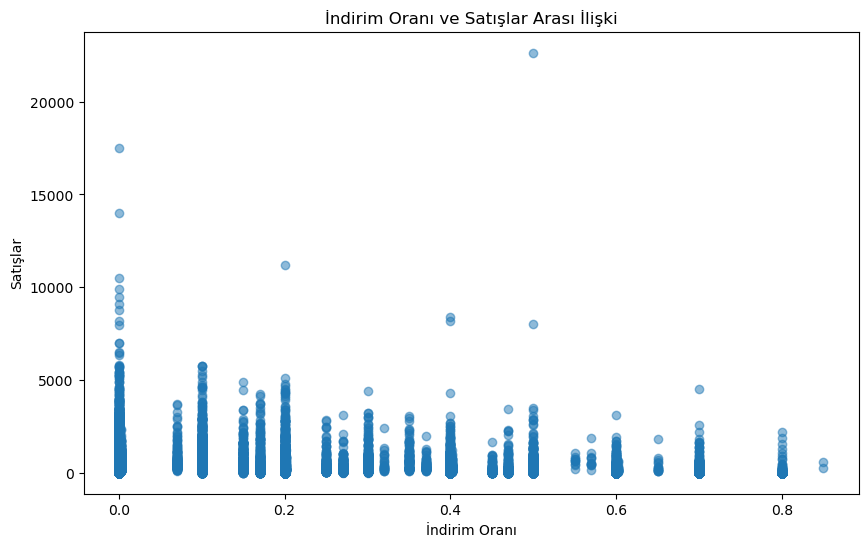

In [14]:
#İndirim oranı ve Satışlar arası korelasyon ilişkisine bakalım
korelasyon=data[['Sales','Discount']].corr()

#Görselleştirelim
plt.figure(figsize=(10,6))
plt.scatter(data['Discount'],data['Sales'],alpha=0.5)
plt.title("İndirim Oranı ve Satışlar Arası İlişki")
plt.xlabel('İndirim Oranı')
plt.ylabel('Satışlar')


In [15]:
#Kayıp eksik veri
data.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

Kayıp veya eksik verimiz bulunmamaktadır

In [18]:
#Müşteri segmenti bazlı satışlara bakalım
group_sales=data.groupby('Segment')['Sales'].value_counts()
group_sales

Segment      Sales
Consumer     13       312
             11       302
             19       275
             12       271
             14       266
                     ... 
Home Office  5451       1
             5725       1
             6440       1
             11200      1
             22638      1
Name: Sales, Length: 4581, dtype: int64

In [19]:
#Segment Bazlı Satışların Ortalamalarına Bakalım
group_sales=data.groupby('Segment')['Sales'].mean()
group_sales.mean()

246.85335878505475

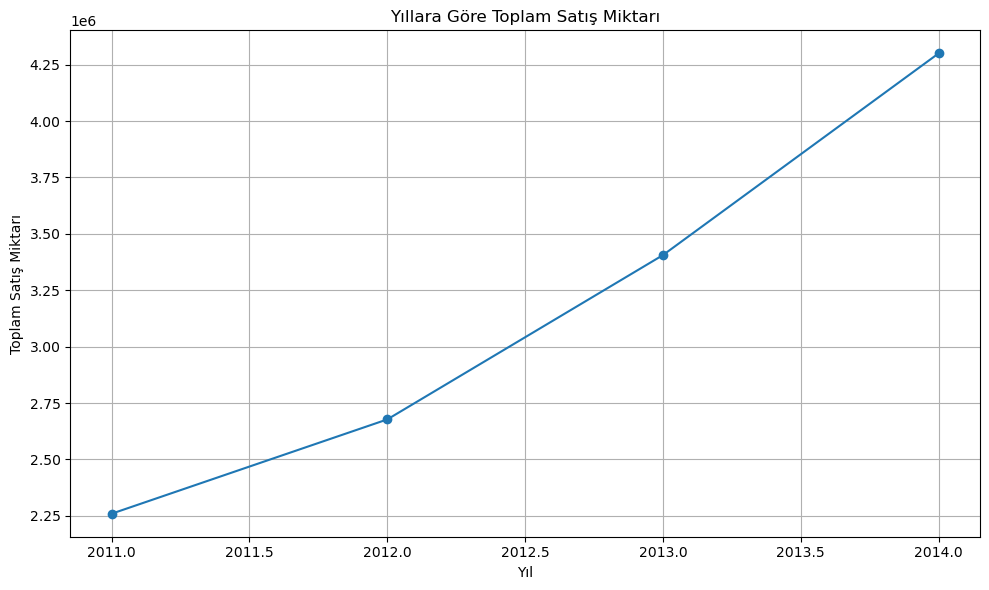

In [29]:
#Yıllara göre satışları alalım

years=data.groupby('Year')['Sales'].sum()

#Görselleştirelim

# Görselleştirelim
plt.figure(figsize=(10, 6))
years.plot(kind='line', marker='o')
plt.title('Yıllara Göre Toplam Satış Miktarı')
plt.xlabel('Yıl')
plt.ylabel('Toplam Satış Miktarı')
plt.grid(True)
plt.tight_layout()
plt.show()


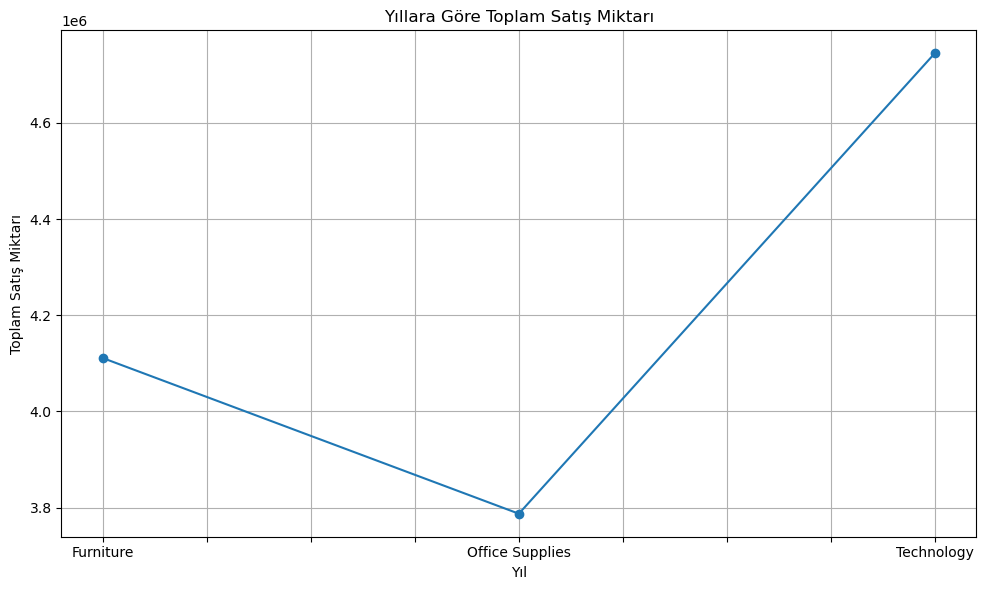

In [30]:
#Satışlara göe kategorileri alalım
say=data.groupby('Category')['Sales'].sum()


# Görselleştirelim
plt.figure(figsize=(10, 6))
say.plot(kind='line', marker='o')
plt.title('Yıllara Göre Toplam Satış Miktarı')
plt.xlabel('Yıl')
plt.ylabel('Toplam Satış Miktarı')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
#Nakliye Modu ve Satış İlişkisine bakalım,Türlere göre
ship_mode=data.groupby('Ship.Mode')['Sales'].sum()
ship_mode




Ship.Mode
First Class       1831067
Same Day           667202
Second Class      2565747
Standard Class    7578889
Name: Sales, dtype: int64

Yukarıdaki verilere baktğımız zaman nakliye moduna göre toplam satışları görmekteyiz.Gördüğümüz gibi,Standard Class nakliye modu,diğer tüm nakliye modlarına göre en fazla satışın gerçekleştiği moddur.Same day ise en az tercih edilen nakliye metodudur.

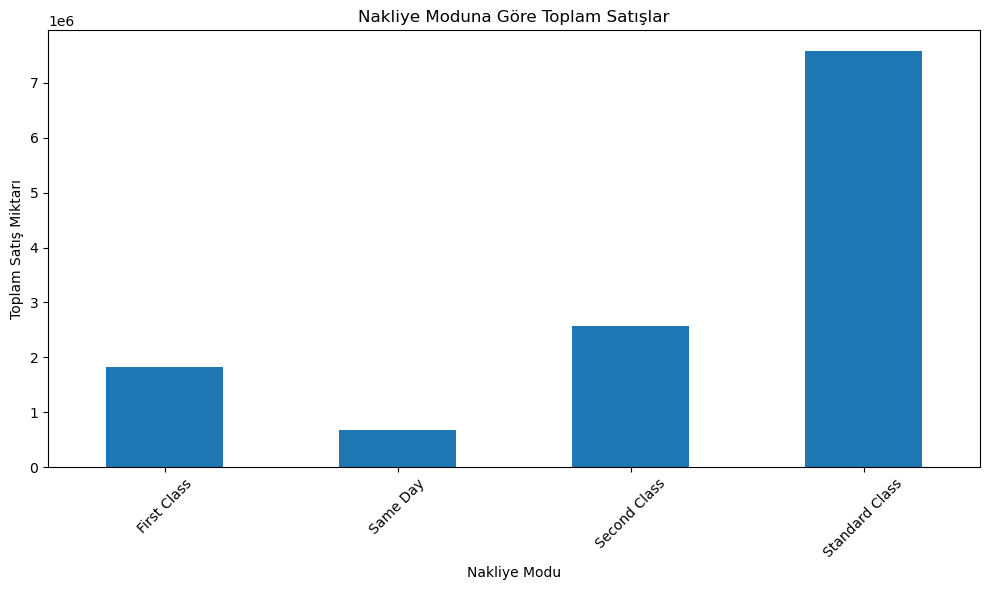

In [39]:
# Nakliye moduna göre satışların dağılımını bar grafiği ile görselleştirelim
plt.figure(figsize=(10, 6))
ship_mode.plot(kind='bar')

plt.title('Nakliye Moduna Göre Toplam Satışlar')
plt.xlabel('Nakliye Modu')
plt.ylabel('Toplam Satış Miktarı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
kategori_kar=data.groupby('Category')['Profit'].sum()

kategori_kar

Category
Furniture          285204.72380
Office Supplies    518473.83430
Technology         663778.73318
Name: Profit, dtype: float64

Ürün kategorilerime göre toplam karları incelediğimizde Teknoloji kategorisi en yüksek kar getiren olurken,en düşük kar Mobilyadadır.

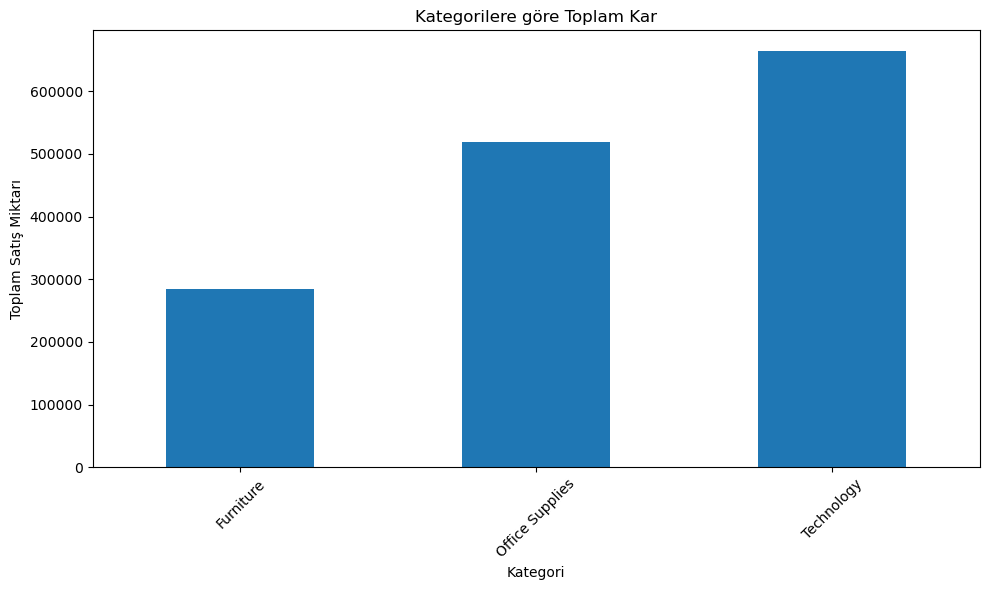

In [42]:
plt.figure(figsize=(10, 6))
kategori_kar.plot(kind='bar')

plt.title('Kategorilere göre Toplam Kar')
plt.xlabel('Kategori')
plt.ylabel('Toplam Satış Miktarı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Ürün kategorilerine göre kar miktarını görselleştirdik

In [44]:
#Alt kategorilerde ki kar oranlarına bakalaım
alt_kategori=data.groupby('Sub.Category')['Profit'].sum()
alt_kategori

Sub.Category
Accessories    129626.30620
Appliances     141680.58940
Art             57953.91090
Binders         72449.84600
Bookcases      161924.41950
Chairs         140396.26750
Copiers        258567.54818
Envelopes       29601.11630
Fasteners       11525.42410
Furnishings     46967.42550
Labels          15010.51200
Machines        58867.87300
Paper           59207.68270
Phones         216717.00580
Storage        108461.48980
Supplies        22583.26310
Tables         -64083.38870
Name: Profit, dtype: float64

Alt kategorilere göre toplam kâr oranları şu şekildedir:

En Yüksek Kâr Getiren Alt Kategoriler:

Copiers: 258,567.55
Phones: 216,717.01
Bookcases: 161,924.42
Appliances: 141,680.59
En Düşük Kâr Getiren Alt Kategoriler:

Tables: -64,083.39 (Bu kategori zarar ediyor)
Fasteners: 11,525.42
Labels: 15,010.51
Bu sonuçlar, bazı alt kategorilerin (örneğin, Tables) zarar ettiğini gösterirken, bazıları (örneğin, Copiers ve Phones) yüksek kâr sağlıyor.

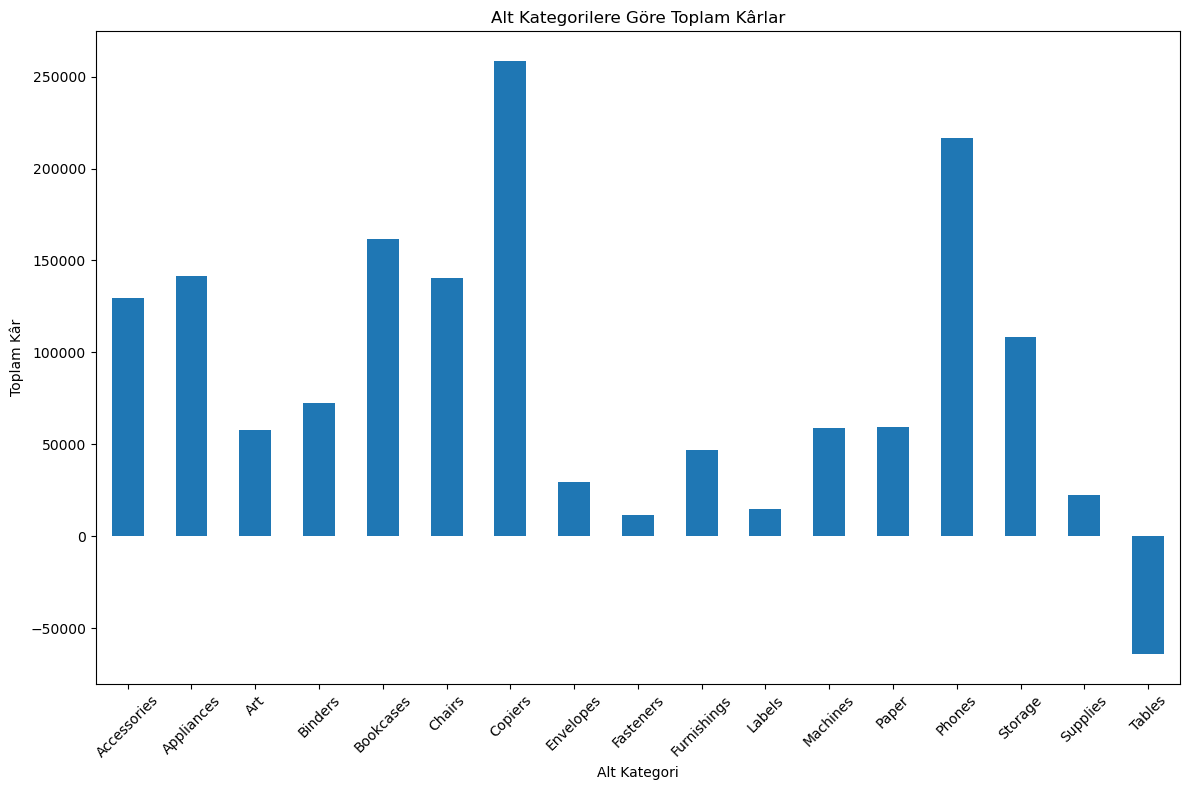

In [47]:
#Görselleştirelim
# Alt kategorilere göre kârları bar grafiği ile görselleştirelim
plt.figure(figsize=(12, 8))
alt_kategori.plot(kind='bar')

plt.title('Alt Kategorilere Göre Toplam Kârlar')
plt.xlabel('Alt Kategori')
plt.ylabel('Toplam Kâr')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


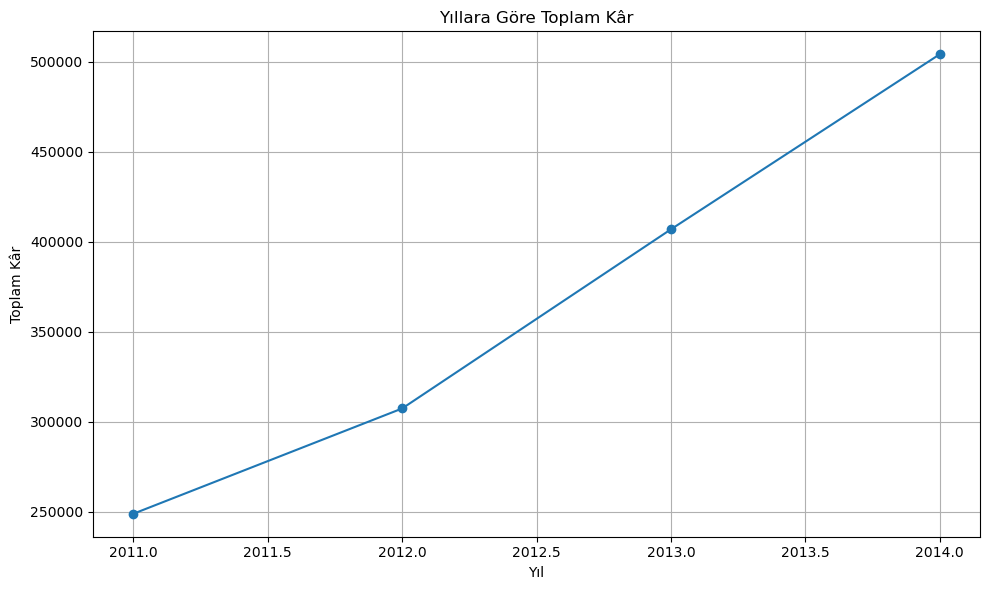

In [49]:
#Karları yıllara göre bakalım
yıllar_kar=data.groupby('Year')['Profit'].sum()


# Yıllara göre kârları bir grafikle görselleştirelim
plt.figure(figsize=(10, 6))
yıllar_kar.plot(kind='line', marker='o')

plt.title('Yıllara Göre Toplam Kâr')
plt.xlabel('Yıl')
plt.ylabel('Toplam Kâr')
plt.grid(True)
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

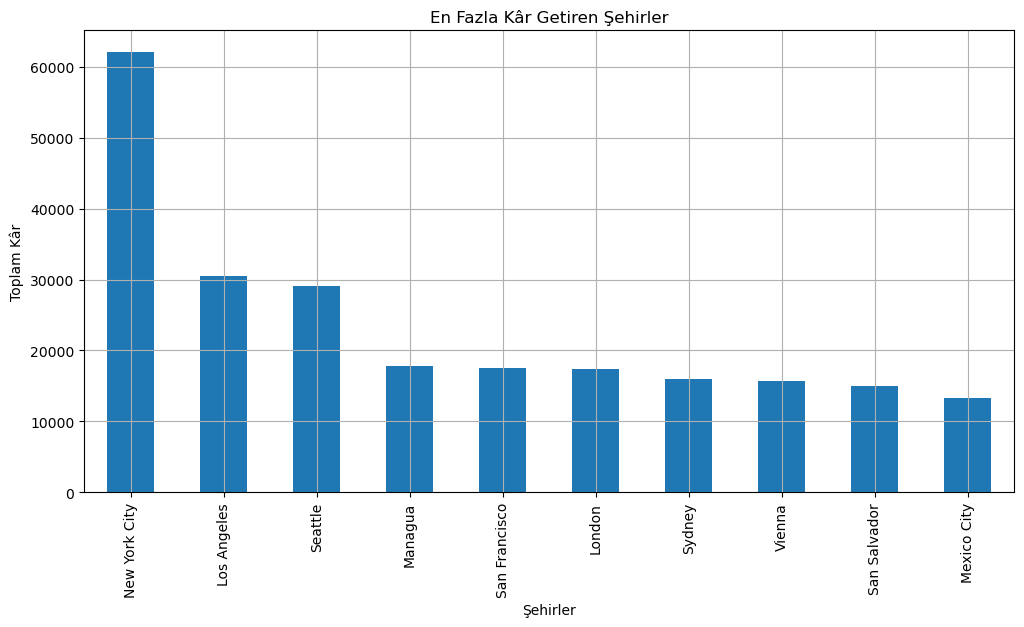

In [56]:
# Şehir bazlı karları inceleyelim
kar_sehir = data.groupby('City')['Profit'].sum()

# Şehir bazlı karları görselleştirelim (ilk 10 şehir)
yüksek_karli_sehirler = kar_sehir.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
yüksek_karli_sehirler.plot(kind='bar')
plt.title('En Fazla Kâr Getiren Şehirler')
plt.xlabel('Şehirler')
plt.ylabel('Toplam Kâr')
plt.grid(True)
plt.tight_layout


New York City satışların en çok olduğu şehirdir

In [57]:
#Seaborn import edelim
import seaborn as sns


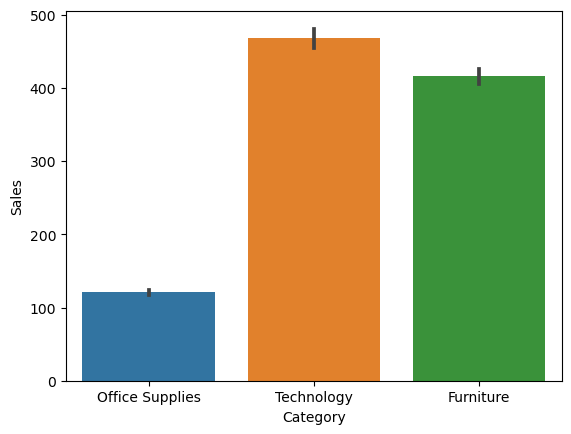

In [59]:
#1-Çubuk Grafiği Seaborn'de inceleyelim
sns.barplot(x='Category',y='Sales',data=data)
plt.show()

Ürün kategorilerine göre satışları görselleştirdik.

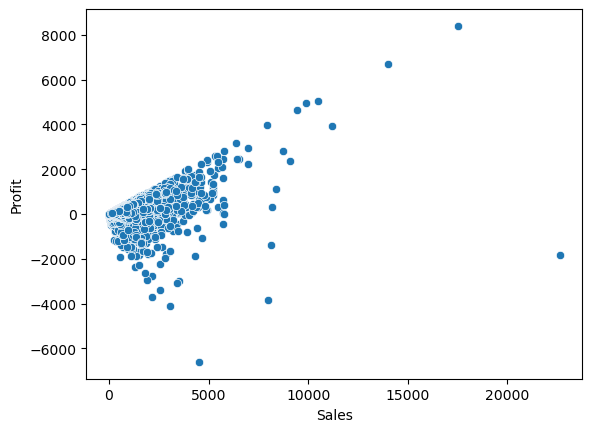

In [60]:
#Dağılım Grafiği
sns.scatterplot(x='Sales',y='Profit',data=data)
plt.show()

Satışlar ve Karlar arasındaki ilişkiyi görselleştirdik.

C:\Users\Casper\AppData\Local\Temp\ipykernel_15628\1870958219.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasyon=data.corr()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pyl

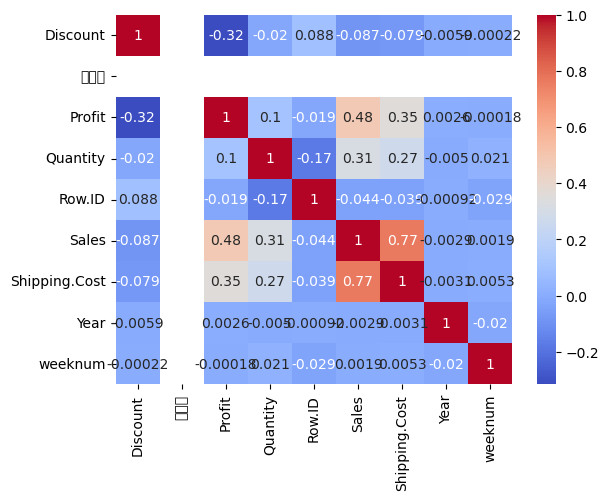

In [63]:
#Isı Haritası
korelasyon=data.corr()
sns.heatmap(korelasyon,annot=True,cmap='coolwarm')